# Beyin Tümörü MRI Veri Seti Özeti

Bu notebook, veri setinin yapısını ve içeriğini detaylı olarak göstermektedir.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# Grafik stilini ayarlama
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

# Veri seti yolunu tanımlama
data_dir = Path('/Users/onurakyuz/Desktop/Brain Tumor MRI/data')

## Veri Seti Yapısını Analiz Etme

In [2]:
# Veri seti yapısını analiz etme fonksiyonu
def analyze_dataset_structure(data_dir):
    print(f"Veri Seti Konumu: {data_dir}")
    print("\nVeri Seti Yapısı:")
    print("=" * 50)
    
    # Veri setindeki tüm dizinleri listeleme
    for split in ['Training', 'Testing']:
        split_dir = data_dir / split
        print(f"\n{split} Klasörü:")
        print("-" * 30)
        
        class_counts = {}
        total_images = 0
        
        for class_dir in sorted(split_dir.iterdir()):
            if class_dir.is_dir():
                class_name = class_dir.name
                num_images = len(list(class_dir.glob('*.jpg')))
                class_counts[class_name] = num_images
                total_images += num_images
                print(f"  - {class_name}: {num_images} görüntü")
        
        print(f"  Toplam: {total_images} görüntü")
    
    # Toplam görüntü sayısını hesaplama
    training_total = sum([len(list((data_dir / 'Training' / d).glob('*.jpg'))) for d in os.listdir(data_dir / 'Training') if (data_dir / 'Training' / d).is_dir()])
    testing_total = sum([len(list((data_dir / 'Testing' / d).glob('*.jpg'))) for d in os.listdir(data_dir / 'Testing') if (data_dir / 'Testing' / d).is_dir()])
    
    print("\nÖzet:")
    print("=" * 50)
    print(f"Toplam görüntü sayısı: {training_total + testing_total}")
    print(f"  - Eğitim seti: {training_total} görüntü")
    print(f"  - Test seti: {testing_total} görüntü")

# Veri seti yapısını analiz etme
analyze_dataset_structure(data_dir)

Veri Seti Konumu: /Users/onurakyuz/Desktop/Brain Tumor MRI/data

Veri Seti Yapısı:

Training Klasörü:
------------------------------
  - glioma: 1321 görüntü
  - meningioma: 1339 görüntü
  - notumor: 1595 görüntü
  - pituitary: 1457 görüntü
  Toplam: 5712 görüntü

Testing Klasörü:
------------------------------
  - glioma: 300 görüntü
  - meningioma: 306 görüntü
  - notumor: 405 görüntü
  - pituitary: 300 görüntü
  Toplam: 1311 görüntü

Özet:
Toplam görüntü sayısı: 7023
  - Eğitim seti: 5712 görüntü
  - Test seti: 1311 görüntü


## Sınıf Dağılımını Görselleştirme

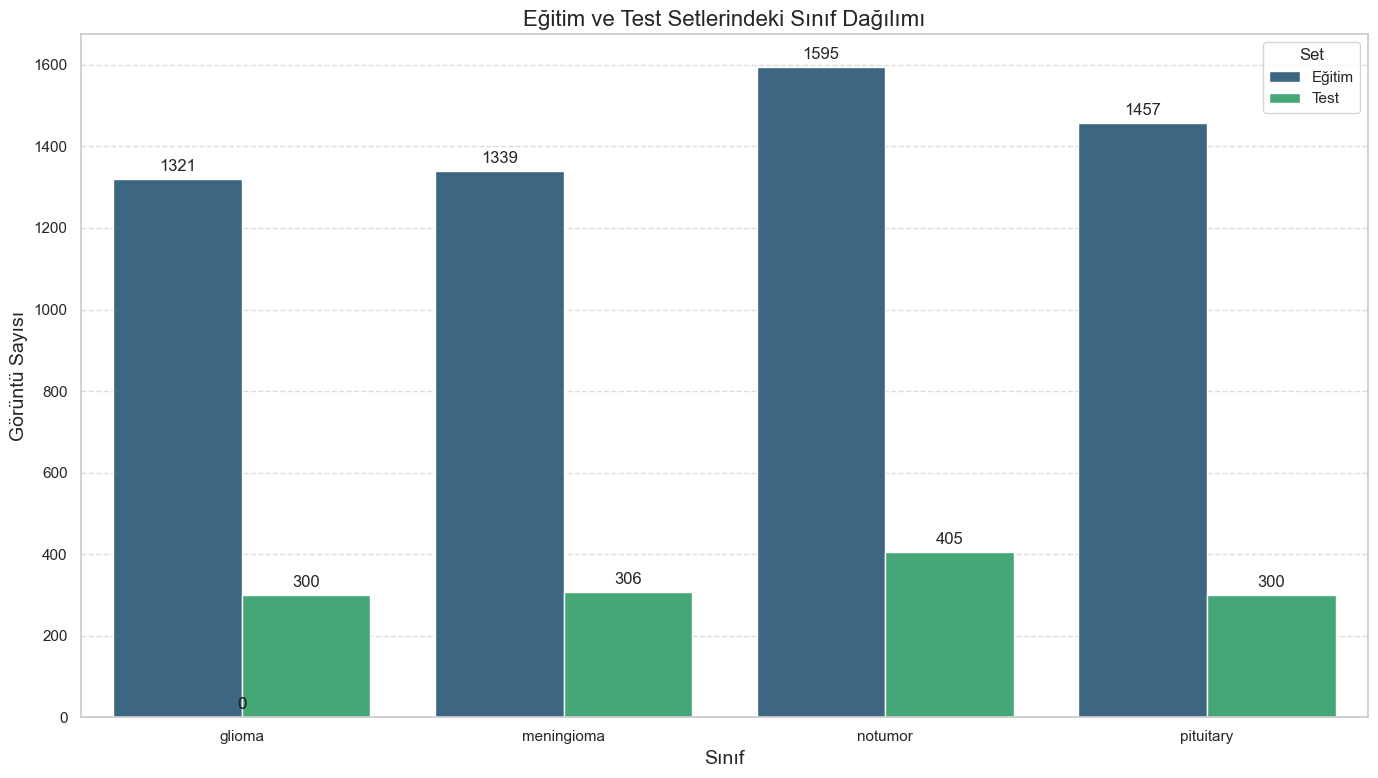

In [3]:
# Sınıf dağılımını görselleştirme fonksiyonu
def visualize_class_distribution(data_dir):
    # Eğitim ve test setleri için sınıf dağılımını hesaplama
    class_counts = {'Training': {}, 'Testing': {}}
    
    for split in ['Training', 'Testing']:
        split_dir = data_dir / split
        
        for class_dir in sorted(split_dir.iterdir()):
            if class_dir.is_dir():
                class_name = class_dir.name
                num_images = len(list(class_dir.glob('*.jpg')))
                class_counts[split][class_name] = num_images
    
    # DataFrame oluşturma
    df_training = pd.DataFrame({
        'Sınıf': list(class_counts['Training'].keys()),
        'Görüntü Sayısı': list(class_counts['Training'].values()),
        'Set': ['Eğitim'] * len(class_counts['Training'])
    })
    
    df_testing = pd.DataFrame({
        'Sınıf': list(class_counts['Testing'].keys()),
        'Görüntü Sayısı': list(class_counts['Testing'].values()),
        'Set': ['Test'] * len(class_counts['Testing'])
    })
    
    df = pd.concat([df_training, df_testing])
    
    # Çubuk grafiği oluşturma
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Sınıf', y='Görüntü Sayısı', hue='Set', data=df, palette='viridis')
    
    plt.title('Eğitim ve Test Setlerindeki Sınıf Dağılımı', fontsize=16)
    plt.xlabel('Sınıf', fontsize=14)
    plt.ylabel('Görüntü Sayısı', fontsize=14)
    
    # Çubukların üzerine sayı etiketleri ekleme
    for i, p in enumerate(plt.gca().patches):
        height = p.get_height()
        plt.text(p.get_x() + p.get_width()/2., height + 20, int(height), ha='center', fontsize=12)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Sınıf dağılımını görselleştirme
visualize_class_distribution(data_dir)

## Sınıfların Açıklamaları

In [4]:
# Sınıfların açıklamaları
class_descriptions = {
    'glioma': {
        'Türkçe': 'Glioma',
        'Açıklama': 'Gliomalar, beynin glial hücrelerinden kaynaklanan tümörlerdir. Bu hücreler nöronları destekler ve korur.',
        'Belirtiler': ['Baş ağrısı', 'Nöbetler', 'Hafıza kaybı', 'Fiziksel güçsüzlük', 'Konuşma zorlukları'],
        'Tedavi': 'Tedavi genellikle cerrahi, radyasyon tedavisi ve kemoterapi içerir. Spesifik yaklaşım, tümörün derecesine ve konumuna bağlıdır.',
        'Prognoz': 'Prognoz, tümörün derecesine bağlı olarak büyük ölçüde değişir; yüksek dereceli gliomalar daha az olumlu bir görünüme sahiptir.'
    },
    'meningioma': {
        'Türkçe': 'Meningioma',
        'Açıklama': 'Meningiomalar, beyni ve omuriliği kaplayan doku tabakalarında (meninges) gelişir.',
        'Belirtiler': ['Baş ağrısı', 'Görme problemleri', 'İşitme kaybı', 'Nöbetler', 'Hafıza sorunları'],
        'Tedavi': 'Küçük, yavaş büyüyen meningiomalar sadece izleme gerektirebilir. Daha büyük veya semptomatik tümörler genellikle cerrahi olarak çıkarılır, bazen radyasyon tedavisi takip eder.',
        'Prognoz': 'Çoğu meningioma iyi huyludur (kanser değildir) ve tedaviden sonra olumlu bir prognoza sahiptir.'
    },
    'notumor': {
        'Türkçe': 'Tümör Yok',
        'Açıklama': 'MRI taramasında tümör tespit edilmemiştir.',
        'Belirtiler': ['Yok'],
        'Tedavi': 'Tümöre özgü tedavi gerekmez. Semptomlar devam ederse, daha ileri tıbbi değerlendirme önerilir.',
        'Prognoz': 'Beyin tümörü yokluğunda mükemmel. Ancak, semptomlar mevcutsa diğer nörolojik durumlar düşünülmelidir.'
    },
    'pituitary': {
        'Türkçe': 'Hipofiz',
        'Açıklama': 'Hipofiz tümörleri, beynin tabanında bulunan ve birçok hormonal fonksiyonu düzenleyen hipofiz bezinde gelişir.',
        'Belirtiler': ['Baş ağrısı', 'Görme problemleri', 'Hormonal dengesizlikler', 'Yorgunluk', 'Açıklanamayan kilo değişimleri'],
        'Tedavi': 'Tedavi seçenekleri arasında hormon üretimini kontrol etmek için ilaçlar, cerrahi ve radyasyon tedavisi bulunur.',
        'Prognoz': 'Çoğu hipofiz tümörü iyi huyludur ve uygun tedavi ile iyi bir prognoza sahiptir.'
    }
}

# Sınıf açıklamalarını tablo olarak gösterme
def display_class_descriptions(class_descriptions):
    print("\nBeyin Tümörü Sınıfları ve Açıklamaları:")
    print("=" * 100)
    
    for class_name, info in class_descriptions.items():
        print(f"\n{info['Türkçe']} ({class_name}):")
        print("-" * 50)
        print(f"Açıklama: {info['Açıklama']}")
        
        print("Belirtiler:")
        for symptom in info['Belirtiler']:
            print(f"  - {symptom}")
        
        print(f"Tedavi: {info['Tedavi']}")
        print(f"Prognoz: {info['Prognoz']}")

# Sınıf açıklamalarını gösterme
display_class_descriptions(class_descriptions)


Beyin Tümörü Sınıfları ve Açıklamaları:

Glioma (glioma):
--------------------------------------------------
Açıklama: Gliomalar, beynin glial hücrelerinden kaynaklanan tümörlerdir. Bu hücreler nöronları destekler ve korur.
Belirtiler:
  - Baş ağrısı
  - Nöbetler
  - Hafıza kaybı
  - Fiziksel güçsüzlük
  - Konuşma zorlukları
Tedavi: Tedavi genellikle cerrahi, radyasyon tedavisi ve kemoterapi içerir. Spesifik yaklaşım, tümörün derecesine ve konumuna bağlıdır.
Prognoz: Prognoz, tümörün derecesine bağlı olarak büyük ölçüde değişir; yüksek dereceli gliomalar daha az olumlu bir görünüme sahiptir.

Meningioma (meningioma):
--------------------------------------------------
Açıklama: Meningiomalar, beyni ve omuriliği kaplayan doku tabakalarında (meninges) gelişir.
Belirtiler:
  - Baş ağrısı
  - Görme problemleri
  - İşitme kaybı
  - Nöbetler
  - Hafıza sorunları
Tedavi: Küçük, yavaş büyüyen meningiomalar sadece izleme gerektirebilir. Daha büyük veya semptomatik tümörler genellikle cerrahi ol

## Her Sınıftan Örnek Görüntüler

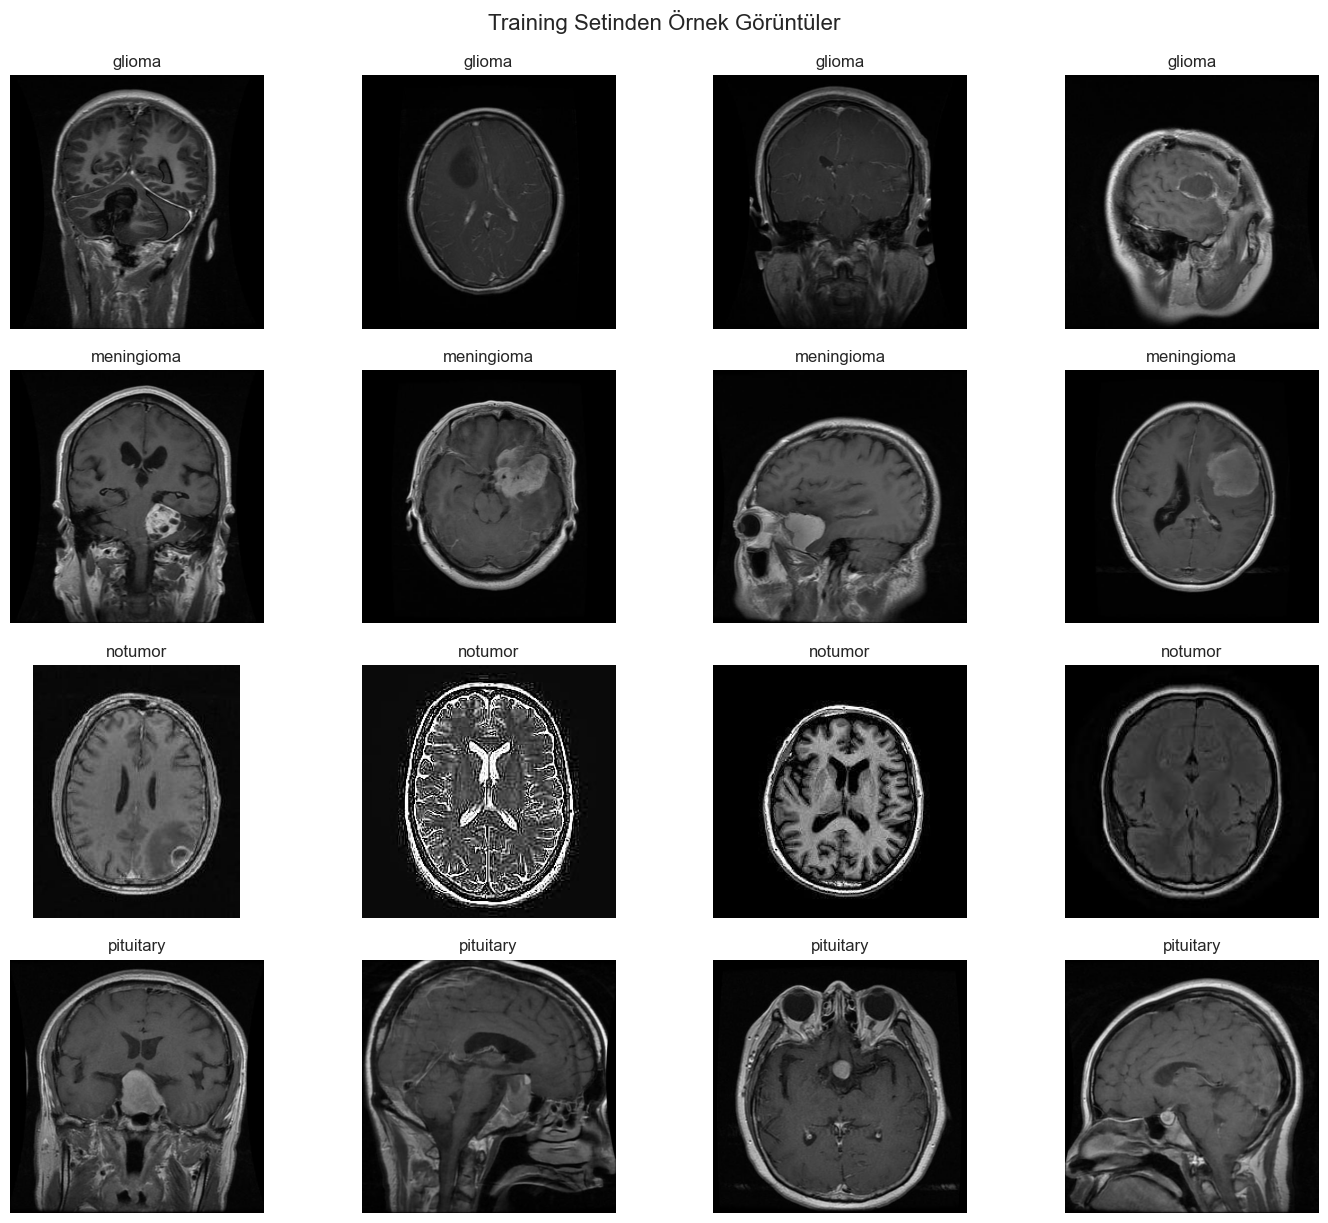

In [5]:
import cv2
import random

def display_sample_images(data_dir, split='Training', num_samples=3):
    split_dir = data_dir / split
    class_dirs = sorted([d for d in split_dir.iterdir() if d.is_dir()])
    
    fig, axes = plt.subplots(len(class_dirs), num_samples, figsize=(15, 12))
    
    for i, class_dir in enumerate(class_dirs):
        class_name = class_dir.name
        image_paths = list(class_dir.glob('*.jpg'))
        
        # Rastgele görüntü seçme
        selected_images = random.sample(image_paths, min(num_samples, len(image_paths)))
        
        for j, img_path in enumerate(selected_images):
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye dönüştürme
            
            axes[i, j].imshow(img)
            axes[i, j].set_title(f'{class_name}')
            axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f'{split} Setinden Örnek Görüntüler', fontsize=16, y=1.02)
    plt.show()

# Eğitim setinden örnek görüntüleri gösterme
display_sample_images(data_dir, split='Training', num_samples=4)

## Veri Seti Özeti ve Öneriler

In [6]:
print("Veri Seti Özeti ve Öneriler:")
print("=" * 100)
print("""
1. Veri Seti Yapısı:
   - Veri seti Eğitim ve Test setlerine ayrılmıştır
   - Dört sınıf vardır: glioma, meningioma, notumor ve pituitary
   - Toplam 7023 görüntü bulunmaktadır (Eğitim: 5712, Test: 1311)

2. Sınıf Dağılımı:
   - Eğitim seti:
     - glioma: 1321 görüntü
     - meningioma: 1339 görüntü
     - notumor: 1595 görüntü
     - pituitary: 1457 görüntü
   - Test seti:
     - glioma: 300 görüntü
     - meningioma: 306 görüntü
     - notumor: 405 görüntü
     - pituitary: 300 görüntü

3. Öneriler:
   - Veri setindeki sınıflar nispeten dengeli olduğundan, ek dengeleme teknikleri gerekmeyebilir
   - Model eğitimi için veri artırma teknikleri kullanılması önerilir (döndürme, çevirme, yakınlaştırma)
   - Görüntülerin standart bir boyuta (örn. 224x224) yeniden boyutlandırılması gereklidir
   - Transfer öğrenme yaklaşımı (MobileNetV2, ResNet gibi) iyi sonuçlar verebilir
""")

Veri Seti Özeti ve Öneriler:

1. Veri Seti Yapısı:
   - Veri seti Eğitim ve Test setlerine ayrılmıştır
   - Dört sınıf vardır: glioma, meningioma, notumor ve pituitary
   - Toplam 7023 görüntü bulunmaktadır (Eğitim: 5712, Test: 1311)

2. Sınıf Dağılımı:
   - Eğitim seti:
     - glioma: 1321 görüntü
     - meningioma: 1339 görüntü
     - notumor: 1595 görüntü
     - pituitary: 1457 görüntü
   - Test seti:
     - glioma: 300 görüntü
     - meningioma: 306 görüntü
     - notumor: 405 görüntü
     - pituitary: 300 görüntü

3. Öneriler:
   - Veri setindeki sınıflar nispeten dengeli olduğundan, ek dengeleme teknikleri gerekmeyebilir
   - Model eğitimi için veri artırma teknikleri kullanılması önerilir (döndürme, çevirme, yakınlaştırma)
   - Görüntülerin standart bir boyuta (örn. 224x224) yeniden boyutlandırılması gereklidir
   - Transfer öğrenme yaklaşımı (MobileNetV2, ResNet gibi) iyi sonuçlar verebilir

